In [1]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

# Toggle cell visibility

from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Promijeni vidljivost <a href="javascript:code_toggle()">ovdje</a>.''')
display(tag)

# Hide the code completely

# from IPython.display import HTML
# tag = HTML('''<style>
# div.input {
#     display:none;
# }
# </style>''')
# display(tag)

In [2]:
continuous_update=False
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Diferencijalne jednadžbe - linearni ili nelinearni sustav

Ovaj interaktivni primjer pokriva različite sustave definirane sljedećim diferencijalnim jednadžbama:

- nelinearna vibracija: $\ddot{x}+0.25\dot{x}+5\sin{x}=F$,
- linearna vibracija: $\ddot{x}+0.25\dot{x}+5x=F$,
- nelinearni sustav: $\ddot{x}+0.003\dot{x}x=F$,
- linearni vremensko-zavisni sustav: $\ddot{x}-0.2{x}t^{\frac{1}{4}}=F$,
- nelinearni vremensko-zavisni sustav: $\ddot{x}+0.0001x^2t=F$,<br>

gdje $F$ predstavlja ulaz (step-funkciju), $t$ vrijeme, a $x$ zavisnu varijablu.

Slika lijevo prikazuje vremenske odzive za različite početne uvjete i različite ulaze. Deblja plava krivulja predstavlja vremenski odziv zasnovan na vrijednostima koje su postavljene odgovarajućim klizačima. Ostale krivulje predstavljaju vremenske odzive dobivene pomoću množitelja i 1) vrijednosti prvog početnog uvjeta - pomaka $x(0)$, 2) vrijednosti drugog početnog uvjeta - brzine $ \dot x(0)$, ili 3) ulaza (ovisno o rezultatu odabira *Što promijeniti*). Množitelji su cjelobrojne vrijednosti u rasponu od -5 do +5.
<br>

*Primjer*:
<br>
$\text{ulaz}=0.7$, $x(0)=2.0$, and $\dot x(0)=5.5$, odabran *ulaz* iz skupa radio-gumbi.
Izlazi: Podebljana krivulja temelji se na gore postavljenim vrijednostima. Ostale krivulje temelje se na istim vrijednostima $x(0)$ i $\dot x(0)$, ali sa sljedećim step-amplitudama:

$0.7\begin{pmatrix}-5& -4& -3& -2& -1& 0& 1& 2& 3& 4& 5\end{pmatrix}=\begin{pmatrix}-3.5& -2.8& -2.1& -1.4& -0.7& 0& 0.7& 1.4& 2.1& 2.8& 3.5\end{pmatrix}$.

Desna slika prikazuje vrijednosti svih vremenskih odziva prikazanih na slici lijevo - u odabranom vremenskom trenutku. Oznake na osi x označavaju cijele vrijednosti u rasponu od -5 do +5. u slučaju linearnog sustava, vremenski odziv je uvijek crta.


---

### Kako koristiti ovaj interaktivni primjer?

Pomičite klizače da biste promijenili vremenske odzive na odabranu step-amplitudu (*ulaz*) ili početne uvjete prethodno definiranih sustava. Možete se prebacivati između različitih sustava klikom na odgovarajući gumb.

#### Legenda:

- *ulaz*: vrijednost ulaza (step-amplituda).
- *poček*: vrijeme čekanja za početak integriranja (za vremensko-zavisne sustave).
- *trenutak*: vremenski trenutak za koji se prikazuju odzivi na desnoj slici.
- $x(0)$: vrijednost prvog početnog uvjeta - pomaka.
- $\dot x(0)$: vrijednost drugog početnog uvjeta - brzine.
<br>

In [3]:
# diferential equations:

def nonlinear_vibr(y,t, x): # y začetni pogoj, t čas, x krmilni vhod
    '''nelinearna vibracija'''
    th, om = y
    b=0.25
    c=5.
    dydt = (om, x - b*om - c*np.sin(th))
    return dydt

def linear_vibr(y,t,x):
    '''linearna vibracija'''
    th, om = y
    b=0.25
    c=5.
    dydt = (om, x - b*om - c*th)
    return dydt

def nonlinear(y,t,x):
    '''nelinearni sustav'''
    c, v = y
    dydt = (v, x - 0.003*c*v)
    return dydt

def time_dependent(y,t,x):
    '''linearni vremensko-zavisni sustav'''
    c, v = y
    dydt = (v, x + .2*c*t**(1/4))
    return dydt

def first_order (y, t, x):
    '''nelinearni vremensko-zavisni sustav prvog reda'''
    c, v = y
    dydt = (v, x - .0001*c*c*t)
    return dydt

<IPython.core.display.Javascript object>


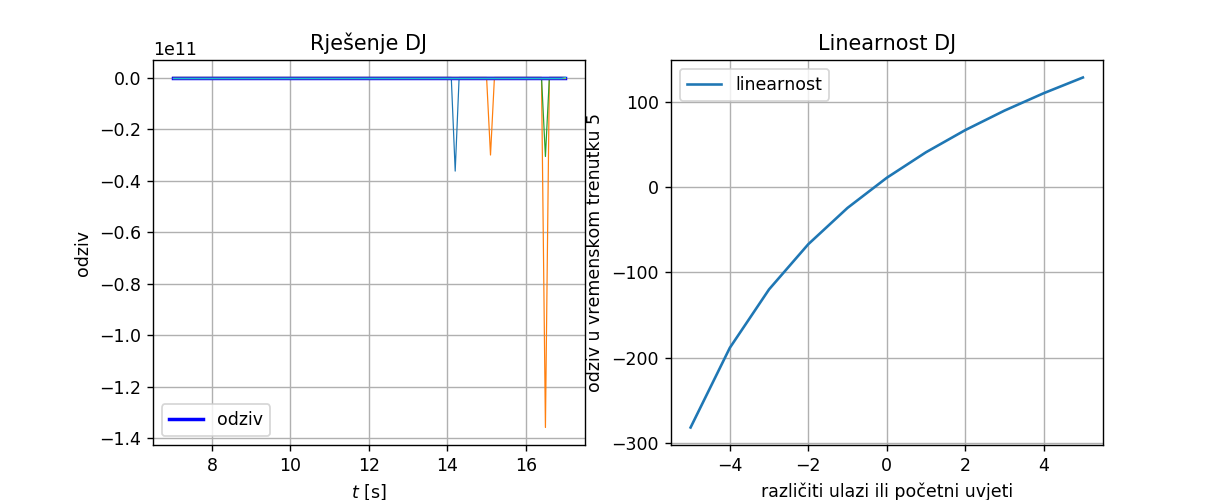

ToggleButtons(description='Odaberi sustav:', options=('nelinearna vibracija', 'linearna vibracija', 'nelinearn…

C:\Users\Sandi\Anaconda3\envs\icct2\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [4]:
fig = plt.figure(figsize=(9.8, 4),num="Diferencijalne jednadžbe (DJ)")

response = fig.add_subplot(1, 2, 1)

pnts_of_resp = fig.add_subplot(1, 2, 2)

y0 = np.array([0.,0.]) # init. conditions

t_end = 10

x=1
t_0=1
t_calc=1
y0_0=1
y0_1=1


def func():
    global y0, x, t_0, t_calc, y0_0, y0_1
    y0[0] = y0_0
    y0[1] = y0_1
    t = np.linspace(0,t_end,t_end*10+1) #time points, where response (solution) is calculated
    linearity = [] # point to look, if d.e. is linear on not
    
    t = t+ t_0
    
    plus_minus = 5.
    input_amp = np.round(np.linspace(-plus_minus,plus_minus,2*int(plus_minus)+1))

    response.clear()
    pnts_of_resp.clear()
    
    current_button = buttons.index
    for amp in input_amp:
        if radio_buttons.index == 0:
            i=amp*x
            input_pack = [i, y0]
        if radio_buttons.index == 1:
            i=amp*float(y0[0])
            input_pack = [x, [i, y0[1]]]
        if radio_buttons.index == 2:
            i=amp*float(y0[1])
            input_pack = [x, [y0[0], i]]

        if current_button == 0:
            solution = odeint(nonlinear_vibr, input_pack[1], t, args=(input_pack[0],))
        if current_button == 1:
            solution = odeint(linear_vibr, input_pack[1], t, args=(input_pack[0],))
        if current_button == 2:
            solution = odeint(nonlinear, input_pack[1], t, args=(input_pack[0],))
        if current_button == 3:
            solution = odeint(time_dependent, input_pack[1], t, args=(input_pack[0],))
        if current_button == 4:
            solution = odeint(first_order, input_pack[1], t, args=(input_pack[0],))
            
        solution = solution[:,0]
        linearity.append(solution[int(t_calc*10)])
        
        if amp == 1:
            response.plot(t, solution, 'b', lw=2, label='odziv')
        else:
            response.plot(t, solution, lw=.7)
        
    response.grid()
    response.set_xlabel('$t$ [s]')
    response.set_ylabel('odziv')
    response.set_title('Rješenje DJ')
    response.legend()

    pnts_of_resp.plot(input_amp, linearity, label='linearnost')
    pnts_of_resp.grid()
    pnts_of_resp.legend()
    pnts_of_resp.set_xlabel('različiti ulazi ili početni uvjeti')
    pnts_of_resp.set_ylabel('odziv u vremenskom trenutku %.1d' %t_calc)
    pnts_of_resp.set_title('Linearnost DJ')
    
    
    
style = {'description_width': 'initial'}
x_widget = widgets.FloatSlider(value=0.5,min=0,max=1,step=.1,description='ulaz',
    disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.1f')
t_0_widget = widgets.IntSlider(value=0,min=0,max=10,step=1,description='poček [s]',
    disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.1d')
t_calc_widget = widgets.IntSlider(value=1,min=1,max=10,step=1,description='trenutak [s]',
    disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.1d',style=style)
y0_0_widget = widgets.FloatSlider(value=0.,min=0,max=10,step=.1,description='$x(0)$',
    disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.1f')
y0_1_widget = widgets.FloatSlider(value=0.,min=0,max=10,step=.1,description='$\dot x(0)$',
    disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.1f')

style = {'description_width': 'initial','button_width':'180px'}

buttons = widgets.ToggleButtons(options=['nelinearna vibracija', 'linearna vibracija', 'nelinearni sustav', 'lin. vrem.-zavisni sustav', 'nelin. vrem.-zavisni sustav'],
    description='Odaberi sustav:',value = 'nelinearna vibracija',disabled=False,style=style)

display(buttons)

i=0
def buttons_clicked(event):
    global i
    i+=1
    if i%5==0: # for more efficient program
        i=0
        func()   

buttons.observe(buttons_clicked)

radio_buttons = widgets.RadioButtons(options=['ulaz', 'x(0)', u'\u1E8B''(0)'],
    value='ulaz',description='Što promijeniti:',disabled=False,style=style)

j=0
def radio_buttons_clicked(event):
    global j
    j+=1
    if j%5==0:
        if radio_buttons.index==0:
            x_widget.min=.1
            y0_0_widget.min=0
            y0_1_widget.min=0
        if radio_buttons.index==1:
            x_widget.min=0
            y0_0_widget.min=.1
            y0_1_widget.min=0
        if radio_buttons.index==2:
            x_widget.min=0
            y0_0_widget.min=0
            y0_1_widget.min=.1
        
        j=0
        func()   

radio_buttons.observe(radio_buttons_clicked)


vbox = widgets.VBox([x_widget, t_0_widget, t_calc_widget, y0_0_widget, y0_1_widget])
hbox = widgets.HBox([vbox, radio_buttons])

#buttons.observe(buttons_clicked)
display(hbox)


k=0
def set_values(event):
    global k, x, t_0, t_calc, y0_0, y0_1
    k+=1
    if k%3==0: # every three times is because .observe sends 3 events
        k=0
        x=x_widget.value
        t_0=t_0_widget.value
        t_calc=t_calc_widget.value
        y0_0=y0_0_widget.value
        y0_1=y0_1_widget.value
        func()

x_widget.observe(set_values)
t_0_widget.observe(set_values)
t_calc_widget.observe(set_values)
y0_0_widget.observe(set_values)
y0_1_widget.observe(set_values)

#initialize:
def initialize():
    set_values(0)
    set_values(0)
    set_values(0)
    x_widget.min = .1
initialize()